# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
dx = [-1,-1,-1,0,0,0,1,1,1]
dy = [-1,0,1,-1,0,1,-1,0,1]
def cmp_median(photo):
    temp = np.copy(photo)
    for i in range (len(photo)):
        for j in range (len(photo[i])):
            if i == 0 or j == 0 or i >= (len(photo) - 1) or j >= (len(photo[i]) - 1) :
                temp[i][j] = photo[i][j]
            else :
                neighbours = np.zeros(9)
                for k in range(9):
                    neighbours[k] = photo[i+dx[k]][j+dy[k]]
                temp[i][j] = np.median(neighbours)
                    
    return temp

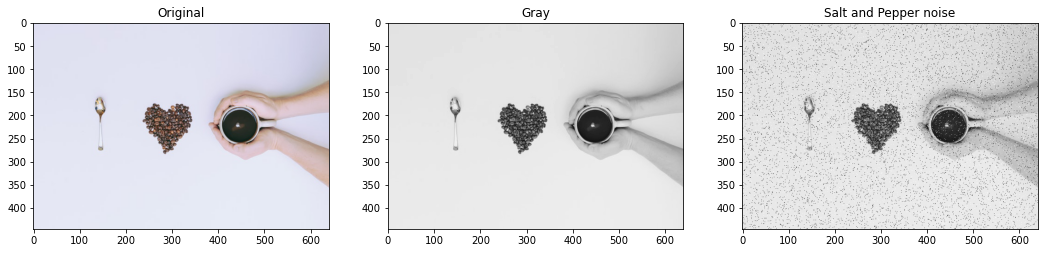

In [16]:
img = io.imread('coffee.jpeg')
gray = rgb2gray(img)
noisy = random_noise(gray,mode='s&p',amount=0.05)   # Impulsive noise
show_images([img, gray, noisy], ['Original', 'Gray', 'Salt and Pepper noise'])

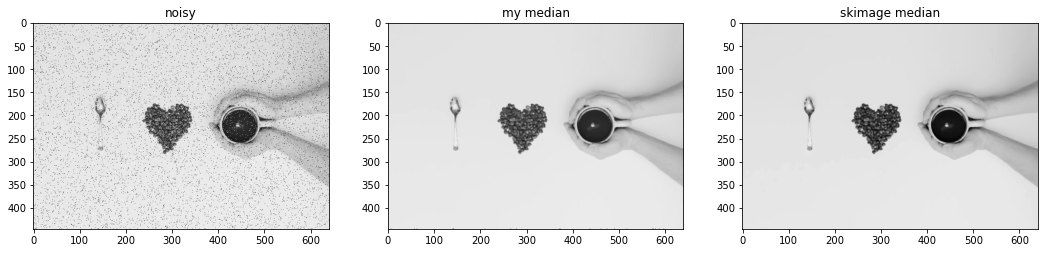

In [17]:
'''
(1) Median Filter


'''
my_median = cmp_median(noisy)
skimage_median = median(noisy)
show_images([noisy,my_median,skimage_median],['noisy','my median','skimage median'])

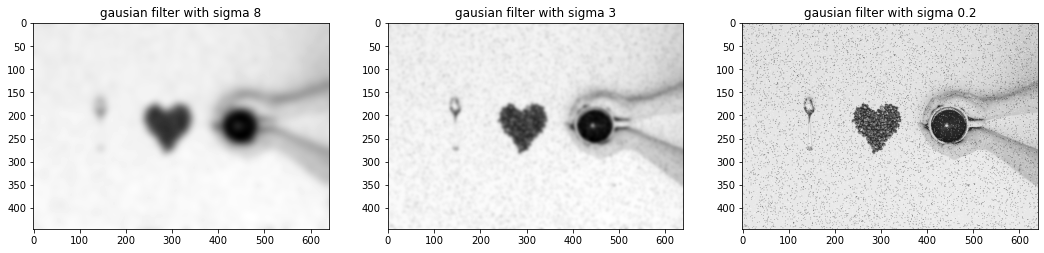

In [23]:
'''
(2) Averaging Filter
'''
'''
More kernel size => greater degree of filtering
Higher value for sigma ⇒ More distribution of values
Sigma controls how "fat" your kernel will be.
Higher sigma values blur over a wider radius => forces you to use a larger kernel matrix
Kernel is big enough to cover most of the object (blurred enough), 
but not so large that it starts overlapping multiple neighboring objects
'''

g1 = gaussian(noisy,sigma=8)
g2 = gaussian(noisy,sigma=3)
g3 = gaussian(noisy,sigma=0.2)
show_images([g1,g2,g3],['gausian filter with sigma 8','gausian filter with sigma 3','gausian filter with sigma 0.2'])